## Regresión lineal & múltiple

- Regresión lineal se refiere a una variable independiente para hacer una predicción.
- Regresión lineal multiple se refiere a múltiples variables independientes para hacer una predicción.

### Regresión Lineal Simple (SLR)

- Es un método que nos ayuda a entender la relación entre dos variables:

  * Variable independiente (predictora $x$)
  * Variable dependiente (objetivo $y$).
  * Ecuación:  $y=b0+b1x$
  - * $b0$: Intersección (valor de y cuando $x=0$).
  - * $b1$: Pendiente (tasa de cambio de $y$ por unidad de $x$).

* Cuando se ajuste / entrene el modelo se obtendrá : $b0$, $b1$

#### Procedimiento para implementar la regresión Lineal

In [ ]:
#Paso 1) Importar bibliotecas necesarias
from sklearn.linear_model import LinearRegression
import numpy as np

#Paso 2) Crear los datos
x = np.array([[x1], [x2], [x3], ...])  # Variable independiente (predictor)
y = np.array([y1, y2, y3, ...])        # Variable dependiente (objetivo)

# Paso 3) Crear el modelo
lm = LinearRegression()

# Paso 4) Ajustar el modelo para calcular b0 (intersección) y b1 (pendiente)
lm.fit(x, y)

# Paso 5) Determinar Parámetros del modelo
b0 = lm.intercept_  # Intersección
b1 = lm.coef_[0]    # Pendiente

#Ecuación final del modelo:
#y = b0 + b1 * x

# Paso 6) Predicción para nuevos valores de x
x_new = np.array([[nuevo_x1], [nuevo_x2], ...])  # Nuevos valores de x
y_pred = lm.predict(x_new)  # Predicciones de y

# Paso 7) Imprimir resultados
print(f"Intersección (b0): {b0}")
print(f"Pendiente (b1): {b1}")
print(f"Predicciones: {y_pred}")

#### Implementar la Regresión Lineal Simple en Python

Paso 1). **instalar librerías necesarias**

In [5]:
!pip install scikit-learn

Paso 2). **Importar librerías necesarias**

In [9]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Paso 3). **Definir datos de entrenamiento**
- Ayuda a identificar las columnas disponibles y elegir cuál será tu predictor ($𝑥$)
y cuál será tu objetivo ($𝑦$).

In [11]:
# Cargar datos del archivo CSV
file_path = 'test.csv'  # Reemplaza con tu ruta real
df = pd.read_csv(file_path, header=0)

# Ver los primeros registros para inspeccionar
df.head()

,ID,FoodGroup,Descrip,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,23116,Beef Products,"Beef, chuck, under blade steak, boneless, sepa...",275.0,28.23,18.00,0.00,0.00,0.0,8.0,...,0.0175,0.235750,0.173077,0.058333,0.011667,0.000100,0.047619,0.258571,0.585455,0.868182
1,10047,Pork Products,"Pork, fresh, loin, center rib (roasts), bone-i...",248.0,26.99,14.68,0.00,0.00,0.0,5.0,...,0.0000,0.593125,0.226923,0.435000,0.015833,0.000094,0.050000,0.328571,0.730909,0.264545
2,15270,Finfish and Shellfish Products,"Crustaceans, shrimp, untreated, raw",85.0,20.10,0.51,0.00,0.00,0.0,0.0,...,0.0000,0.000000,0.000000,0.000000,0.053333,0.000434,0.083333,0.305714,0.000000,0.121818
3,1259,Dairy and Egg Products,"Cheese spread, American or Cheddar cheese base...",176.0,13.41,8.88,10.71,7.06,0.0,185.0,...,0.0000,0.009562,0.340000,0.031667,0.464167,0.000036,0.064286,1.330000,0.281818,0.164545
4,19100,Sweets,"Candies, fudge, chocolate, prepared-from-recipe",411.0,2.39,10.41,76.44,73.12,1.7,44.0,...,0.0100,0.011000,0.065385,0.021667,0.040833,0.000366,0.085714,0.101429,0.045455,0.100909


Paso 4). **Seleccionar las columnas de interés:**
    
    * Predictor: Energy_kcal (energía calórica de los alimentos).
    * Objetivo: Protein_g (cantidad de proteínas en gramos).

In [13]:
# Variables predictora (x) y objetivo (y)
x = df[['Energy_kcal']].values  # Predictor: Energía calórica
y = df['Protein_g'].values      # Objetivo: Proteína en gramos

# Eliminar filas con valores nulos
x = x[~np.isnan(x).any(axis=1)]
y = y[~np.isnan(y)]

Paso 5). **Crear el modelo de regresión lineal**

In [22]:
# Crear el modelo
lm = LinearRegression()

# Ajustar el modelo con los datos
lm.fit(x, y)

# Parámetros
b0 = lm.intercept_  # Intersección
b1 = lm.coef_[0]    # Pendiente

# Obtener los parámetros
print(f"Intersección (b0): {lm.intercept_}")
print(f"Pendiente (b1): {lm.coef_[0]}")

# Imprimir ecuación
print(f"Ecuación del modelo: y = {b0} + {b1} * x")

Intersección (b0): 9.82725273526305
Pendiente (b1): 0.007696826009486671
Ecuación del modelo: y = 9.82725273526305 + 0.007696826009486671 * x


Paso 6). **Hacer predicciones**

- *Por ejemplo*, ¿qué cantidad de proteínas estimarías para un alimento con 500 calorías? 

In [17]:
# Predicción para un nuevo valor de energía
x_new = np.array([[500]])  # Calorías del nuevo alimento
y_pred = lm.predict(x_new)

print(f"Predicción de proteína para 500 kcal: {y_pred[0]} g")

Predicción de proteína para 500 kcal: 13.675665740006385 g


Paso 7). **Visualizar resultados** 

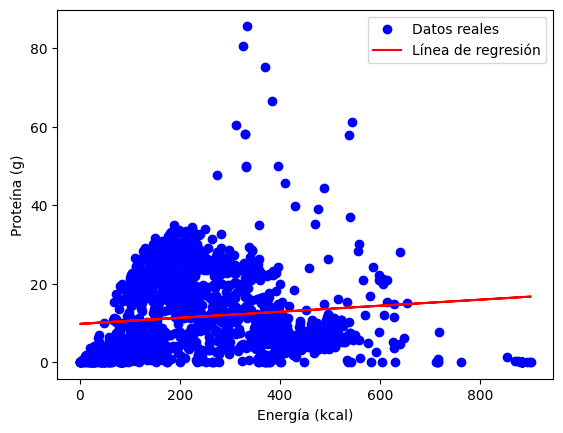

In [19]:
# Visualización
plt.scatter(x, y, color="blue", label="Datos reales")  # Datos reales
plt.plot(x, lm.predict(x), color="red", label="Línea de regresión")  # Línea ajustada
plt.xlabel("Energía (kcal)")
plt.ylabel("Proteína (g)")
plt.legend()
plt.show()

### Regresión lineal Múltiple 

- **Propósito** : Explica cómo una variable objetivo ($𝑦$) está influenciada por varias variables predictoras $(x1, x2, ...,xn)$

- **Componentes básicos**
  * $b0$: intersección, es el valor de $y$ cuando todos los $x=0$
  * $b1, b2,...:$ Coeficientes que muestran el impacto de cada $x$ en $y$

- **Visualización**
  * Con dos variables $(x1, x2)$, la relación puede representarse en un plano $2D$ como una superficie o plano inclinado.

#### Procedimiento para implementar la regresión Multple

In [ ]:
#Importar Librerías Necesarias
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

#Cargar los Datos
df = pd.read_csv('ruta_al_archivo.csv')

#Seleccionar Variables
# Seleccionar la variable objetivo (y)
y = df['NombreVariableObjetivo']

# Seleccionar las variables predictoras (X)
X = df[['NombrePredictor1', 'NombrePredictor2', 'NombrePredictor3']]

#Entrenar el Modelo
# Crear el modelo
modelo = LinearRegression()

# Ajustar el modelo
modelo.fit(X, y)

#Obtener los Parámetros del Modelo
# Obtener la intersección (b0)
interseccion = modelo.intercept_

# Obtener los coeficientes (b1, b2, ...)
coeficientes = modelo.coef_

# Mostrar resultados
print(f"Intersección (b0): {interseccion}")
print(f"Coeficientes (b1, b2, ...): {coeficientes}")

#Hacer Predicciones
# Nuevos valores para las variables predictoras
X_nuevo = np.array([[10, 20, 30]])  # Reemplazar con valores reales

# Hacer una predicción
y_pred = modelo.predict(X_nuevo)

print(f"Predicción: {y_pred[0]}")


#### Implementar la Regresión Lineal Múltiple en Python

Paso 1) **Importar bibliotecas necesarias**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

Paso 2) **Cargar los datos desde el archivo CSV**

In [26]:
file_path = 'test.csv'  # Reemplazar con la ruta real del archivo
df = pd.read_csv(file_path, header=0)

Paso 3) **Seleccionar la variable objetivo y las variables predictoras**

In [28]:
# Variable objetivo (y)
y = df['Energy_kcal']

# Variables predictoras (X)
X = df[['Protein_g', 'Fat_g', 'Carb_g', 'Sugar_g']]

Paso 4) **Ajustar el modelo de regresión lineal múltiple**

In [29]:
# Crear el modelo de regresión
lm = LinearRegression()

# Ajustar el modelo con las variables predictoras y objetivo
lm.fit(X, y)

LinearRegression()

Paso 5) **Obtener los parámetros del modelo**

In [30]:
# Intersección (b0)
b0 = lm.intercept_

# Coeficientes (b1, b2, b3, ...)
coefficients = lm.coef_

# Mostrar resultados
print(f"Intersección (b0): {b0}")
print(f"Coeficientes (b1, b2, ...): {coefficients}")

Intersección (b0): 4.373063564293346
Coeficientes (b1, b2, ...): [3.99528048 8.8046645  3.73142757 0.15263642]


Paso 6) **Construir la ecuación del modelo**

In [31]:
# Construir la ecuación del modelo
equation = f"y = {b0:.2f} + ({coefficients[0]:.2f})*Protein_g + ({coefficients[1]:.2f})*Fat_g + ({coefficients[2]:.2f})*Carb_g + ({coefficients[3]:.2f})*Sugar_g"
print(f"Ecuación del modelo: {equation}")

Ecuación del modelo: y = 4.37 + (4.00)*Protein_g + (8.80)*Fat_g + (3.73)*Carb_g + (0.15)*Sugar_g


Paso 7) **Realizar predicciones con el modelo**

In [32]:
# Nuevos datos de entrada
X_new = np.array([[25.0, 15.0, 5.0, 10.0]])  # Ejemplo de valores para Protein_g, Fat_g, Carb_g, Sugar_g

# Predicción
y_pred = lm.predict(X_new)

# Mostrar la predicción
print(f"Predicción para X_new: {y_pred[0]:.2f} kcal")

Predicción para X_new: 256.51 kcal


/home/milena/Documentos/cursos_2025/analisis_datos/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Paso 8) **Visualización (si hay solo dos predictores)**

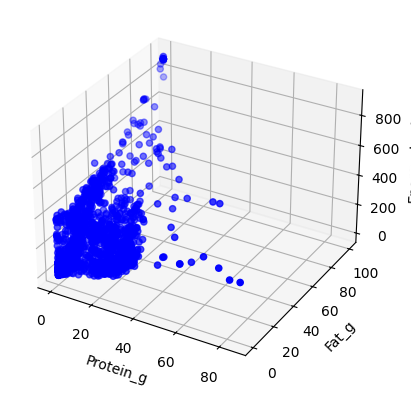

In [33]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Variables predictoras (dos columnas) y objetivo
X_2 = df[['Protein_g', 'Fat_g']]
y = df['Energy_kcal']

# Crear gráfico 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_2['Protein_g'], X_2['Fat_g'], y, color='blue')

# Etiquetas
ax.set_xlabel('Protein_g')
ax.set_ylabel('Fat_g')
ax.set_zlabel('Energy_kcal')
plt.show()

### Evaluación de modelos mediante visualización

- **Propósito**: evaluar la relación entre una variable independiente (predictora) y una variable independiente (respuesta), la dirección de la relación (positiva o negativa), fuerza de la correlación y representación visual de la línea que mejor se ajuste.

- **Herramientas**
  * $seaborn.regplot$ para trazar gráficas de regresión.
  * $sns.residplot$ para graficar los residuos.

#### Paso 1. Ajustar el modelo de regresión

- Se tiene un conjunto de datos con variables independientes ($x$) y ($y$).
- Ajustar a un modelo de regresión lineal que prediga ($y$) a partir de ($x$)
 * *Nota*: ver regresión lineal simple y múltiple. 

#### Paso 2. Calcular los residuos

- **Función**: se construye para evaluar cuanto se desvían los valores reales de los valores predichos por un modelo.
-  **Se definen los residuos**
Los residuos son la diferencia entre el valor real ($yreal$) y el valor predicho por el modelo ($ypred$).
    
    $residuo = yreal - ypred$

- b) En el eje $X$ colocar la variable independiente ($X$)
- c) En el eje $Y$ colocar los residuos $yreal - ypred$

#### Paso 3. Construir el grafico de residuos

**sintaxis** : Construir el gráfico de residuos

In [ ]:
# a) Crear modelo de regresión lineal (sintaxis)
model = LinearRegression()
model.fit(X, Y_real)
Y_pred = model.predict(X)

In [ ]:
# b) Calcular los residuos (sintaxi)
residuos = Y_real - Y_pred

In [ ]:
# c) Gráfica de residuos (sintaxis)
plt.figure(figsize=(8, 5))  #lowess=True: Dibuja una curva suavizada de tendencia. 
sns.residplot(x=Y_pred.flatten(), y=residuos.flatten(), lowess=True, color='blue', line_kws={'color': 'red'})
plt.axhline(y=0, color='black', linestyle='--', linewidth=1) #line_kws={'color': 'red'}: Especifica el color de la línea suavizada.
plt.xlabel("Valores Predichos (Y_pred)") #plt.axhline(y=0) Dibuja una línea horizontal en y=0 como referencia para los residuos.
plt.ylabel("Residuos (Y_real - Y_pred)")
plt.title("Gráfica de Residuos")
plt.show()

**Ejemplo aplicado** : Calcular residuos

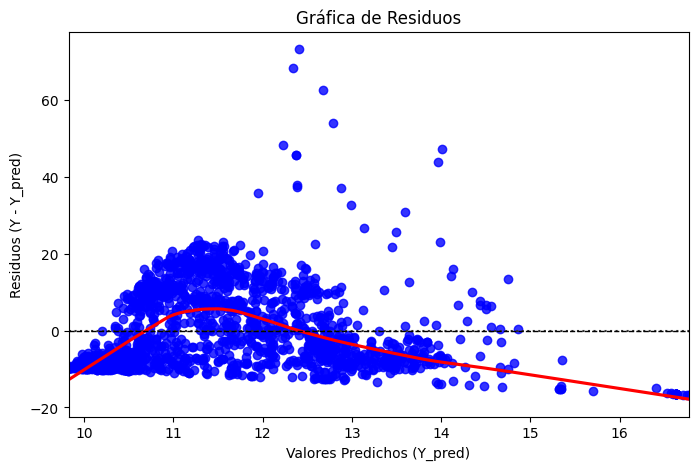

In [19]:
# Importar Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

#Cargar y explorar los datos
file_path = 'test.csv'  # Reemplaza con la ruta real a tu archivo
df = pd.read_csv(file_path, header=0)

#Definir variables predictoras (X) y objetivo (Y)
X = df[['Energy_kcal']].values  # Predictor: Energía calórica
Y = df['Protein_g'].values.reshape(-1, 1)  # Objetivo: Proteína en gramos

# Crear modelo de regresión lineal
model = LinearRegression()
model.fit(X, Y)  # Ajustar el modelo a los datos
Y_pred = model.predict(X)  # Generar predicciones basadas en el modelo

# Calcular residuos
residuos = Y - Y_pred

# Visualizar la gráfica de residuos
# Gráfica de residuos
plt.figure(figsize=(8, 5))
sns.residplot(x=Y_pred.flatten(), y=residuos.flatten(), lowess=True, color='blue', line_kws={'color': 'red'})
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.xlabel("Valores Predichos (Y_pred)")
plt.ylabel("Residuos (Y - Y_pred)")
plt.title("Gráfica de Residuos")
plt.show()

#### Paso 4. Interpretar el grafico de residuos

##### **Modelo bien ajustado**
  * Los residuos distribuidos alrededor de $y=0$
  * La grafica no muestra lineas curvas o tendencias.
  * Se espera que los resultados tengan una media cero distribuida uniforme alrededor de del eje x con una varianza similar. **NO hay curvatura**. Sugiere una **gráfica lineal**
  * 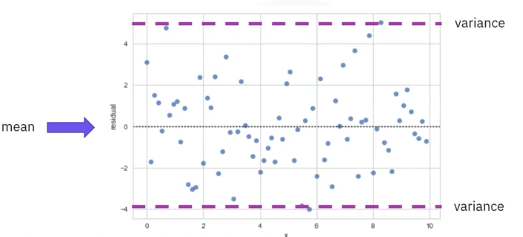 Fuente: Coursera

##### **Modelo mal ajustado**
  * a) **Los residuos muestran un patron (curva, parábola, ondas  o  agrupación):**.
     - * Indica que la relación $X$ e $Y$ no es lineal y el modelo lineal no es adecuado, quizá un modelo regresión polinómica sea adecuado.
       * Los residuos no se separan aleatoriamente. **La suposición lineal ES INCORRECTA** Sugiere una **función no lineal o polinómico**
       * 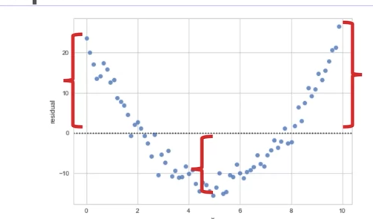 Fuente: Coursera
 * b)  **Los residuos muestran un patron Funnel shape (forma de embudo):**
     - * La varianza de los residuos aumenta con $x$, por tanto el modelo **es incorrecto**
       * 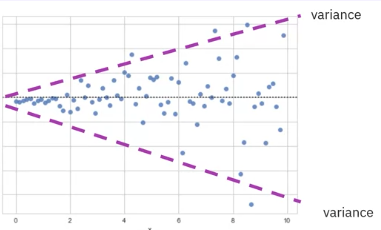 Fuente: Coursera

 * c)  **Mayor dispersión en ciertos valores:**.
     - * Ejemplo: Los residuos se vuelven más grandes (o pequeños) a medida que los valores predichos aumentan.
       * Interpretación: **Hay heterocedasticidad**, lo que significa que la varianza de los errores no es constante.


 * d)  **Residuos lejanos a 0 (outliers):**
     - * Ejemplo: Algunos puntos están muy lejos de la línea horizontal.
       * Interpretación: Podría haber valores atípicos (outliers) que el modelo no está manejando bien.

##### **Calcular la media de los residuos**
- La media de los residuos debe ser cercana a cero. Si la regresión se ajusta correctamente y no tiene sesgo.

    * Resultado **Ejemplo aplicado**

In [20]:
# Calcular la media de los residuos
media_residuos = np.mean(residuos)
print(f"Media de los residuos: {media_residuos}")


Media de los residuos: -1.0880700826024736e-15


##### **Calcular la desviación estandar de los residuos**
- La desviación estandar generalmente, se considera baja cuando está cerca de cero ($<1$) o es mucho menor que la media de los valores de salida. El modelo tiene buena capacidad predictiva.
- La desviación estándar es alta si los residuos están muy dispersos alrededor de cero, es considerablemente mayor que la media. Sugiere que el modelo necesita ser ajustado o que quizás no sea adecuado para los datos. También podría indicar que existen valores atípicos

    * Resultado **Ejemplo aplicado**

In [21]:
# Calcular la desviación estándar de los residuos
desviacion_residuos = np.std(residuos)
print(f"Desviación estándar de los residuos: {desviacion_residuos}")


Desviación estándar de los residuos: 10.673602072302952


##### **Verificar la distribución de los residuos (gráfico de dispersión**

- En este gráfico, esperamos ver una distribución aproximada normal con una media cerca de cero y una distribución simétrica.
  * Resultado **Ejemplo aplicado**
- $axvline(x=0)$ dibuja una línea vertical en el cero, que es útil para observar cómo se distribuyen los residuos alrededor de cero.

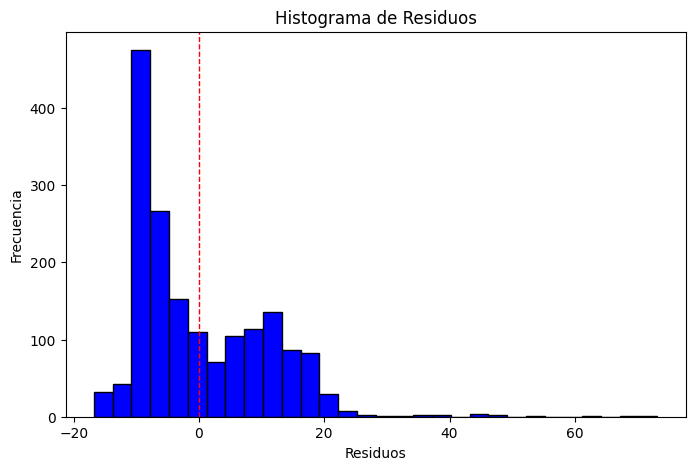

In [27]:
# Graficar el histograma de los residuos para verificar su distribución
plt.figure(figsize=(8, 5))
plt.hist(residuos.flatten(), bins=30, color='blue', edgecolor='black')
plt.axvline(x=0, color='red', linestyle='--', linewidth=1)
plt.title("Histograma de Residuos")
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.show()

### Regresión polinómica

- La regresión polinómica es un caso especial de regresión lineal general.
- Una relación curvilínea surge cuando transformamos las variables predictoras elevándolas al cuadrado, al cubo o a un orden superior.
- **El modelo puede ser cuadrático** : La variable predictora se eleva al cuadrado, representada como $x_1²$

#### Orden del polinomio

* **2º orden (cuadrático)**: Ajuste moderado para relaciones simples.
    * 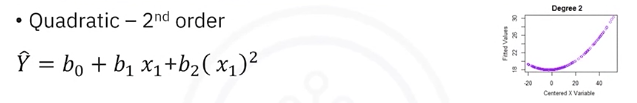 Fuente: Coursera

* **3º orden (cúbico)**: La variable predictora se eleva al cubo.
  - 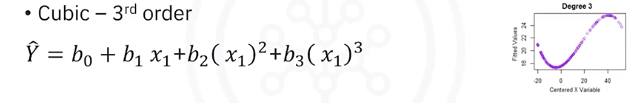 Fuente: Coursera - IBM

* **Orden superior**: Se utiliza cuando los modelos de 2º y 3º orden no logran un buen ajuste.
  - 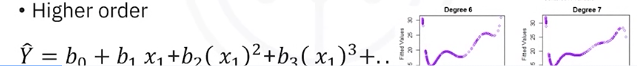 Fuente: Coursera

#### Polimomio de tercer orden (regresión)

Sintaxis : **procedimiento paso a paso para calcular un polinomio de tercer order**

In [33]:
# Paso 1: Importar las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#  Paso 2: Cargar los datos desde un archivo CSV (puede ser un archivo diferente según el caso)
df = pd.read_csv('ruta/a/tu/archivo.csv')

In [ ]:
# Paso 3:Definir las variables predictoras (X) y la variable objetivo (Y)
X = df['columna_predictora'].values  # Cambia 'columna_predictora' por la columna que usas como predictor
Y = df['columna_objetivo'].values    # Cambia 'columna_objetivo' por la columna objetivo (lo que quieres predecir)

In [ ]:
# Paso 4: Limpiar los datos (opcional)
# Eliminar valores nulos
df = df.dropna()

In [ ]:
# Paso 5: Ajustar un polinomio de tercer orden usando np.polyfit
coefficients = np.polyfit(X, Y, 3)  # 3 es el grado del polinomio

In [ ]:
# Paso 6: Crear el polinomio a partir de los coeficientes obtenidos
polynomial = np.poly1d(coefficients)

In [ ]:
# Paso 7: Mostrar los coeficientes y construir la ecuación
print(f'Coeficientes del polinomio: {coefficients}')
a_3, a_2, a_1, a_0 = coefficients

In [ ]:
# Construir la ecuación del polinomio
equation = f'y = ({a_3:.4f})x^3 + ({a_2:.4f})x^2 + ({a_1:.4f})x + ({a_0:.4f})'
print('Ecuación del polinomio ajustado:')
print(equation)

In [ ]:
# Paso 8: Evaluar el polinomio en los valores de X
Y_pred = polynomial(X)

In [ ]:
# Paso 9: Visualización del resultado. Graficar los datos originales y el ajuste polinómico
plt.scatter(X, Y, color='blue', label='Datos originales')  # Datos originales
plt.plot(X, Y_pred, color='red', label='Ajuste polinómico de 3er orden')  # Ajuste del polinomio
plt.xlabel('Variable predictora (X)')
plt.ylabel('Variable objetivo (Y)')
plt.title('Ajuste polinómico de tercer orden')
plt.legend()
plt.show()

#### Polinómica Multidimensional (regresión lineal)

- Usando para manejar varias variables predictoras (x1,x2,…,xn).

##### Polinomio bidimensional de 2° Orden
* Nota : La función $polyfit$ **NO** puede realizar este tipo de regresión.
* Se usa la librería $sklearn.preprocessing$ para crear un objeto polinomial.
* Involucra dos variables predictoras ($𝑥_1$, $𝑥_2$ y una variable objetivo ($y$).

 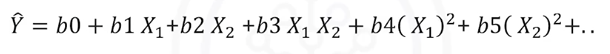

Sintaxis : **Procedimiento para implementar un polinomio bidimensional de 2° Orden**

In [ ]:
# Paso 1: Importar las librerías necesarias
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Paso 2: Cargar los datos desde un archivo CSV
# Asegúrate de reemplazar 'ruta/a/tu/archivo.csv' con la ubicación real de tu archivo
df = pd.read_csv('ruta/a/tu/archivo.csv')

# Paso 3: Definir las variables predictoras y objetivo
# Supongamos que el archivo tiene las columnas: "x1", "x2" (predictoras) y "y" (objetivo)
X = df[['x1', 'x2']].values  # Seleccionar las columnas de las variables predictoras
y = df['y'].values  # Seleccionar la columna de la variable objetivo

# Paso 4: Transformar las variables predictoras a características polinómicas de segundo orden
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Paso 5: Ajustar un modelo de regresión lineal con las características polinómicas
model = LinearRegression()
model.fit(X_poly, y)

# Paso 6: Mostrar los coeficientes y la ecuación ajustada
coefficients = model.coef_
intercept = model.intercept_

# Paso 7: Reconstruir la ecuación del polinomio
feature_names = poly.get_feature_names_out(['x1', 'x2'])  # Nombres de los términos polinómicos
equation = " + ".join([f"({coef:.4f})*{name}" for coef, name in zip(coefficients, feature_names)])
equation = f"y = {intercept:.4f} + " + equation
print("Ecuación del polinomio ajustado:", equation)

# Paso 8: Hacer predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Paso 9: Graficar los datos y el ajuste (solo para x1 como ejemplo)
plt.scatter(X[:, 0], y, color="blue", label="Datos originales")
plt.scatter(X[:, 0], model.predict(X_poly), color="red", label="Predicciones")
plt.xlabel("x1 (Primera variable predictora)")
plt.ylabel("y (Variable objetivo)")
plt.title("Ajuste polinómico bidimensional de grado 2")
plt.legend()
plt.show()

Ejemplo aplicado: **Implementar la Regresión Lineal polinomio bidimensional de 2° Orden**

Ecuación del polinomio ajustado: y = 3.1845 + (-0.1250)*x1 + (-0.1250)*x2 + (0.2905)*x1^2 + (0.1655)*x1 x2 + (0.0405)*x2^2


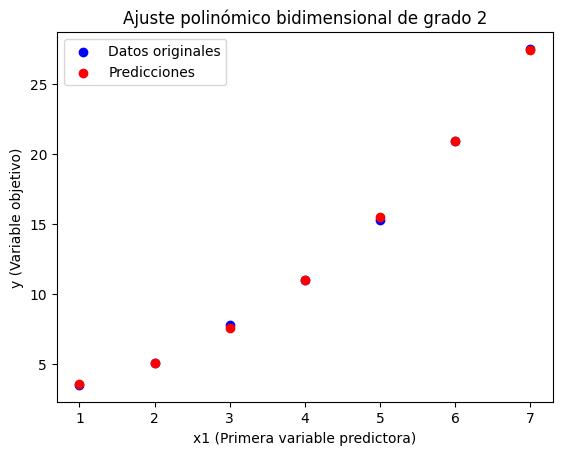

In [38]:
# Paso 1: Importar las librerías necesarias
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Paso 2: Crear datos ficticios (bidimensionales)
# Variables predictoras (X)
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [6, 7], [7, 8]])
# Variable objetivo (y)
y = np.array([3.5, 5.1, 7.8, 11.0, 15.3, 20.9, 27.5])

# Paso 3: Transformar los datos a características polinómicas de segundo orden
poly = PolynomialFeatures(degree=2, include_bias=False)  # Crear términos hasta el grado 2
X_poly = poly.fit_transform(X)

# Paso 4: Entrenar un modelo de regresión lineal con las nuevas características
model = LinearRegression()
model.fit(X_poly, y)

# Paso 5: Mostrar los coeficientes y la ecuación del polinomio
coefficients = model.coef_
intercept = model.intercept_

# Reconstruir la ecuación del polinomio
feature_names = poly.get_feature_names_out(['x1', 'x2'])
equation = " + ".join([f"({coef:.4f})*{name}" for coef, name in zip(coefficients, feature_names)])
equation = f"y = {intercept:.4f} + " + equation
print("Ecuación del polinomio ajustado:", equation)

# Paso 6: Dividir los datos para probar el modelo (opcional)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 7: Graficar los datos y el ajuste (para una sola variable predictora x1 si aplica)
# (No es sencillo graficar 2D completo, pero puedes observar proyecciones)
plt.scatter(X[:, 0], y, color="blue", label="Datos originales")
plt.scatter(X[:, 0], model.predict(X_poly), color="red", label="Predicciones")
plt.xlabel("x1 (Primera variable predictora)")
plt.ylabel("y (Variable objetivo)")
plt.title("Ajuste polinómico bidimensional de grado 2")
plt.legend()
plt.show()


### Escalar datos 

#### Escalar los datos ($Scaling$)

- Ajusta las columnas para que tengan: $Media = 0$ y $desviación estándar = 1$ (en el caso del $StandardScaler$), o escaladas a un rango específico, como $[0,1]$  usando ($MinMaxScaler$).
  
-  El escalado o la normalización **solo se aplica a las variables predictoras (X)**, y no a la variable objetivo (y) en la mayoría de los casos.

  
-  Escalar y normalizar en *métodos como regresión lineal, SVM, y algoritmos basados en distancias (k-NN, PCA)*

 ##### a) Sintaxis : **Procedimiento para escalar los datos usando ($StandardScaler$)**

In [ ]:
# Paso 1: Importar librerías
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Paso 2: Cargar datos
df = pd.read_csv('ruta/a/tu/archivo.csv')  # Reemplazar con la ruta al archivo

# Paso 3: Seleccionar las variables predictoras
X = df[['x1', 'x2', 'x3']].values  # Reemplazar con las columnas de interés

# Paso 4: Crear una instancia de StandardScaler
scaler = StandardScaler()

# Paso 5: Ajustar y transformar los datos
X_scaled = scaler.fit_transform(X) #calcula la media y desviación estándar y transforma los datos

# Paso 6 (Opcional): Visualizar los datos escalados
print("Datos originales:", X[:5]) # Primeras 5 filas antes de escalar
print("Datos escalados:", X_scaled[:5]) # Primeras 5 filas después de escalar 

b) Ejemplo aplicado : **Procedimiento para escalar los datos usando ($StandardScaler$)** y **($MinMaxScaler$)** 

In [51]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 1. Cargar datos del archivo CSV
file_path = 'test.csv'  # Reemplaza con tu ruta real
df = pd.read_csv(file_path, header=0)

# 2. Seleccionar las columnas de interés
X = df[['Energy_kcal']].values  # Predictor: Energía calórica
y = df['Protein_g'].values      # Objetivo: Proteína en gramos

# 3. Elegir el método de escalado o normalización
# A) StandardScaler (escalado a media=0, desviación estándar=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Ajustar y transformar los datos

# B) MinMaxScaler (escalado al rango [0, 1])
scaler_minmax = MinMaxScaler()
X_minmax = scaler_minmax.fit_transform(X)

# Paso 6 (Opcional): Visualizar los datos escalados
print("Datos originales 'Energy_kcal':", X[:5]) # Primeras 5 filas antes de escalar
print("Datos escalados 'Energy_kcal':", X_scaled[:5]) # Primeras 5 filas después de escalar 
print("Datos escalado al rango [0, 1] 'Energy_kcal':", X_minmax[:5]) # Primeras 5 filas después de escalar 
print("y (sin cambios) 'Protein_g':", y[:5])

Datos originales 'Energy_kcal': [[275.]
 [248.]
 [ 85.]
 [176.]
 [411.]]
Datos escalados 'Energy_kcal': [[ 0.30508261]
 [ 0.14298941]
 [-0.83557326]
 [-0.28925913]
 [ 1.12155208]]
Datos escalado al rango [0, 1] 'Energy_kcal': [[0.30487805]
 [0.27494457]
 [0.09423503]
 [0.19512195]
 [0.4556541 ]]
y (sin cambios) 'Protein_g': [28.23 26.99 20.1  13.41  2.39]


### Normalizar datos 

#### Normalizar los datos
- Útil si quieres ajustar las filas para análisis basado en vectores, como clustering o similitudes.
- Escalar cada fila (en lugar de cada columna) para que tenga una norma específica. Las normas más comunes son:
  * **L2 Normalization**: Escala cada fila de los datos para que la norma L2 (la longitud del vector) sea igual a 1.
  * **L1 Normalization**: Escala cada fila para que la suma de los valores absolutos sea igual a 1.
  * **Min-Max Normalization**: Escala entre 0 y 1. Cuando quieres que todos los valores estén en el mismo rango, sin perder proporcionalidad.
  * **Z-Score Normalization**: Centra en 0 y ajusta la desviación estándar a 1. Cuando las características tienen diferentes escalas o distribuciones.

 ##### a) Sintaxis : **Procedimiento para normalizar datos**

In [54]:
from sklearn.preprocessing import Normalizer

# Datos originales (ejemplo)
X = [[4, 1, 2], [1, 3, 9], [5, 0, 0]]

# Crear una instancia de Normalizer
normalizer = Normalizer(norm='l2')  # Usando norma L2

# Transformar los datos
X_normalized = normalizer.fit_transform(X)

# Visualizar resultados
print("Datos originales:")
print(X)
print("\nDatos normalizados (L2):")
print(X_normalized)


Datos originales:
[[4, 1, 2], [1, 3, 9], [5, 0, 0]]

Datos normalizados (L2):
[[0.87287156 0.21821789 0.43643578]
 [0.10482848 0.31448545 0.94345635]
 [1.         0.         0.        ]]


 ##### b) Ejemplo práctico : **Procedimiento para normalizar datos**

In [59]:
# Cargar datos del archivo CSV
file_path = 'test.csv'  # Reemplaza con tu ruta real
df = pd.read_csv(file_path, header=0)

# Variables predictoras
X = df[['Energy_kcal', 'Fat_g', 'Carb_g']].values

# Normalización L2
from sklearn.preprocessing import Normalizer
scaler_L2 = Normalizer(norm='l2')
X_normalized_L2 = scaler_L2.fit_transform(X)

# Normalización L1
scaler_L1 = Normalizer(norm='l1')
X_normalized_L1 = scaler_L1.fit_transform(X)

# Normalización Min-Max
from sklearn.preprocessing import MinMaxScaler
scaler_minmax = MinMaxScaler()
X_normalized_minmax = scaler_minmax.fit_transform(X)

# Normalización Z-Score
from sklearn.preprocessing import StandardScaler
scaler_zscore = StandardScaler()
X_normalized_zscore = scaler_zscore.fit_transform(X)


# Mostrar los resultados
print("Original Data (Primeras filas) ['Energy_kcal', 'Fat_g', 'Carb_g']:\n", X[:5])  # Muestra las primeras filas antes de normalizar
print("\n Normalización L2 ['Energy_kcal', 'Fat_g', 'Carb_g']:\n", X_normalized_L2[:5])  # Muestra las primeras filas de L2
print("\n Normalización L1 ['Energy_kcal', 'Fat_g', 'Carb_g']:\n", X_normalized_L1[:5])  # Muestra las primeras filas de L1
print("\n Normalización Min-Max ['Energy_kcal', 'Fat_g', 'Carb_g'] :\n", X_normalized_minmax[:5])  # Muestra las primeras filas de Min-Max
print("\n Normalización Z-Score ['Energy_kcal', 'Fat_g', 'Carb_g']:\n", X_normalized_zscore[:5])  # Muestra las primeras filas de Z-Score


Original Data (Primeras filas) ['Energy_kcal', 'Fat_g', 'Carb_g']:
 [[275.    18.     0.  ]
 [248.    14.68   0.  ]
 [ 85.     0.51   0.  ]
 [176.     8.88  10.71]
 [411.    10.41  76.44]]

 Normalización L2 ['Energy_kcal', 'Fat_g', 'Carb_g']:
 [[0.99786471 0.06531478 0.        ]
 [0.99825265 0.05909012 0.        ]
 [0.999982   0.00599989 0.        ]
 [0.99689024 0.05029764 0.06066304]
 [0.98283618 0.02489373 0.18279318]]

 Normalización L1 ['Energy_kcal', 'Fat_g', 'Carb_g']:
 [[0.93856655 0.06143345 0.        ]
 [0.94411451 0.05588549 0.        ]
 [0.99403579 0.00596421 0.        ]
 [0.89984151 0.04540109 0.0547574 ]
 [0.82554986 0.02090991 0.15354022]]

 Normalización Min-Max ['Energy_kcal', 'Fat_g', 'Carb_g'] :
 [[0.30487805 0.18       0.        ]
 [0.27494457 0.1468     0.        ]
 [0.09423503 0.0051     0.        ]
 [0.19512195 0.0888     0.1086758 ]
 [0.4556541  0.1041     0.77564688]]

 Normalización Z-Score ['Energy_kcal', 'Fat_g', 'Carb_g']:
 [[ 0.30508261  0.47384245 -0.7905

### Pipelines

- Un pipeline combina múltiples pasos de preprocesamiento y modelado en una sola estructura secuencial. 
- Son una herramienta esencial en la biblioteca scikit-learn. 
- Permiten combinar múltiples pasos del flujo de trabajo de modelado (como preprocesamiento, transformación de datos y entrenamiento) en una estructura secuencial y eficiente.
- **Pasos para obtener una predicción** : transformación polinómica, normalización y regresión lineal se simplifican el proceso usando un pipeline.
  * 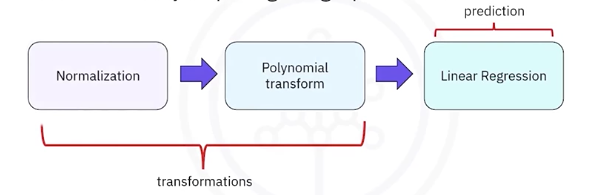 Fuente: Coursera -IBM

 ##### a) Sintaxis : **Procedimiento para usar Pipelines**

In [63]:
# Paso 1) Importar las bibliotecas necesarias
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score

# Paso 2) Cargar los datos desde un archivo CSV
df = pd.read_csv('test.csv')  # Asegúrate de reemplazar con la ruta correcta

# Paso 3) Definir las variables predictoras y la variable objetivo
X = df[['Energy_kcal', 'Fat_g', 'Carb_g']].values  # Variables predictoras
y = df['Protein_g'].values  # Variable objetivo

# Paso 4) Crear una lista de tuplas que contiene el nombre del estimador y el constructor del modelo
input_pipeline = [
    ('polynomial', PolynomialFeatures(degree=2)),  # Paso 1: Transformar las características en polinómicas de grado 2
    ('scale', StandardScaler()),  # Paso 2: Escalar los datos (normalización)
    ('model', LinearRegression())  # Paso 3: Aplicar el modelo de regresión lineal
]

# Paso 5) Crear el pipeline con los pasos definidos en la lista
pipe = Pipeline(input_pipeline)

# Paso 6) Dividir los datos en conjunto de entrenamiento y conjunto de prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 7) Ajustar el modelo (entrenar el pipeline) utilizando el conjunto de entrenamiento
pipe.fit(X_train, y_train)

# Paso 8) Hacer predicciones utilizando el conjunto de prueba
predictions = pipe.predict(X_test)

# Paso 9) Mostrar las primeras predicciones
print(predictions)

# Evaluar el rendimiento del modelo en los datos de prueba
mse = mean_squared_error(y_test, predictions)  # Error cuadrático medio
r2 = r2_score(y_test, predictions)  # R² Score (coeficiente de determinación)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

[ 2.63943876e+01  2.28892644e+01  1.22211349e+00  2.90262020e+01
  1.60761206e+01  4.87031117e+00  6.15562789e+00  1.40388526e+00
  2.39229349e+01  6.30343707e-01  2.70768899e+01  5.53875595e+00
  1.42686473e+01  2.41402232e+01  1.40264993e+01  1.37753077e+01
  1.04821748e+01  2.79136471e+01  1.44435732e+01  1.11446930e+01
  1.99160147e+01  1.52033525e+01  1.87708816e+00  1.13790037e+01
  5.87858977e+00  9.97210514e-03  7.47887393e+00  3.12326236e+01
  6.64082194e+00  1.46821295e+01  3.58455122e+00  1.43587138e+00
  1.34591510e+01  9.65197423e+00  9.78663468e+00  2.46373645e+01
  2.78867849e+01  2.74697837e+01  1.09331929e+00  7.74800967e+00
  7.27404613e+00  6.91199866e+00  1.24535578e+01  6.35303693e+00
  2.89501103e+01  1.09930282e-01  1.96289899e+01  9.15450845e+00
  3.04348537e+00  2.90373534e+01  2.99231914e+01  2.88546826e+00
  1.68532505e+01  1.54410859e+01  8.28199798e+00  2.40236261e+01
  1.89682299e+00  2.11463031e+01  6.06442443e+00 -3.46075328e+00
 -7.86093011e-01  7.87677

### Ajustar el modelo

- Después de evaluar un modelo con visualizaciones, es crucial evaluar numéricamente su desempeño. Esto nos ayuda a determinar qué tan bien el modelo se ajusta a los datos. 

#### MSE (Error Cuadrático Medio):
* Mide cuánto se desvían las predicciones del modelo respecto a los valores reales.
* Un valor bajo indica que las predicciones están cerca de los valores reales.

 - **Interpretación** :
      * *MSE bajo*: Los valores predichos están más cerca de los valores reales.
      * *MSE alto*: Las predicciones tienen un error mayor.
    

* Sintaxis : **Calcular el MSE en Python**

In [70]:
from sklearn.metrics import mean_squared_error

# Calcular el MSE
mse = mean_squared_error(y_test, y_pred)
print("Error Cuadrático Medio (MSE):", mse)

Error Cuadrático Medio (MSE): 128.72821368550717


#### Coeficiente de Determinación (R²):
* El coeficiente $𝑅^2$ mide qué tan bien los datos reales se ajustan a la línea de regresión. 

 - **Interpretación** :
      * $𝑅^2=1$: El modelo predice perfectamente los valores reales (ajuste perfecto).
      * $𝑅^2=0$: El modelo no explica mejor la variación que simplemente usar el promedio.
      * $𝑅^2<0$: El modelo es peor que usar el promedio (puede indicar sobreajuste o mal ajuste).
      * 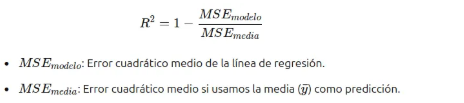
      * 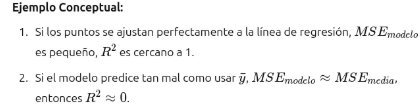

In [72]:
r_squared = model.score(X_test, y_test)
print("Coeficiente de Determinación (R²):", r_squared)

Coeficiente de Determinación (R²): 0.014188501066597303


#### Procedimiento : Coeficiente de Determinación (R²)y MSE (Error Cuadrático Medio)

In [73]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Cargar datos del archivo CSV
file_path = 'test.csv'  # Ruta del archivo
df = pd.read_csv(file_path)

# Seleccionar predictor (Energía) y objetivo (Proteínas)
X = df[['Energy_kcal']]
y = df['Protein_g']

# Dividir datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predicción
y_pred = model.predict(X_test)

# Calcular MSE
mse = mean_squared_error(y_test, y_pred)
print("Error Cuadrático Medio (MSE):", mse)

# Calcular R²
r_squared = model.score(X_test, y_test)
print("Coeficiente de Determinación (R²):", r_squared)


Error Cuadrático Medio (MSE): 128.72821368550717
Coeficiente de Determinación (R²): 0.014188501066597303


### Predicciones y toma de desiciones

- **Una gráfica de distribución es un buen método para la regresión lineal múltiple.**
- **El error cuadrático medio** :
  - Para determinar si el modelo es bueno o no.
  - A medida que el error cuadrático aumentam los objetivos se alejan de los pronosticados. 
  - **Ejemplo**:

  *Un error cuadrático medio de 3.495*
  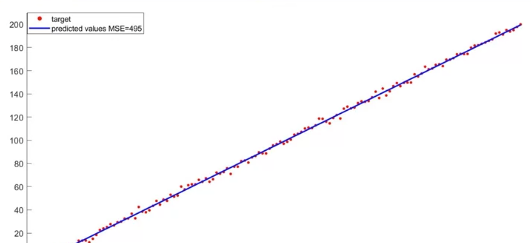

  *Un error cuadrático medio de 3651*
  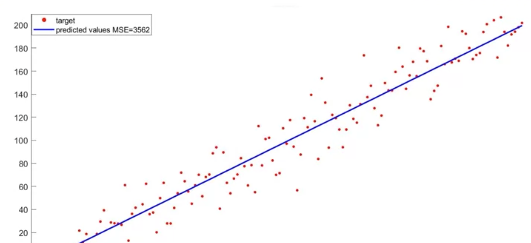

  *Un error cuadrático medio de 12870*
  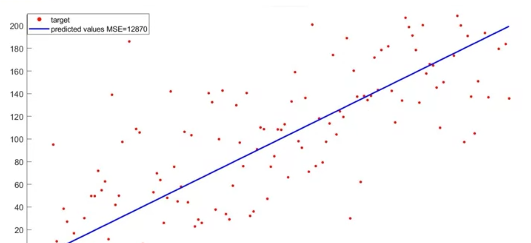

Fuente : Coursera - IBM

**Coeficiente de Determinación (R²)**: para evaluar el modelo.

- **Ejemplo 1**: En la gráfica los puntos en rojo y la línea pronosticada en azul $R² = 0,998$
  *El modelo para encajar bien*.
  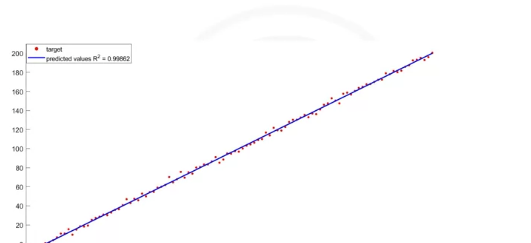
  
- **Ejemplo 2**: $R² = 0,9226$
  *El modelo fuerte relación lineal*.
    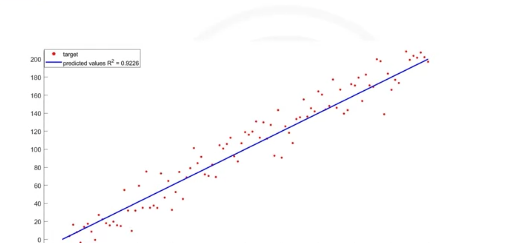

- **Ejemplo 3**: $R² = 0,6181$
    *El modelo fuerte relación lineal.*
    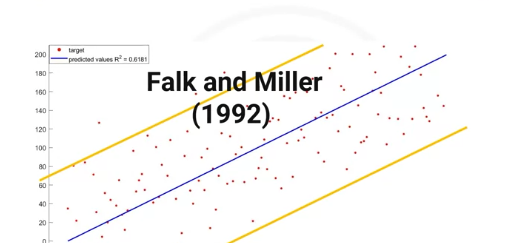


  Fuente : Coursera - IBM

**Comparación un modelo MLR (Multiple Linear Regression) & SLR (Simple Linear Regression)**: 
- El MSE (Mean Squared Error) mide la diferencia promedio entre los valores predichos por el modelo y los valores reales.
- **Cuanto más bajo sea el MSE, mejor es el modelo**.
- Cuando usas más variables en un modelo (como en MLR), el modelo tiene más información para hacer predicciones, lo que generalmente reduce el MSE.
- Por eso, **el MSE del modelo MLR tiende a ser menor que el MSE de un modelo SLR**.
- Debido a que la regresión polinomial tiene más flexibilidad para ajustarse a los datos (al poder crear curvas en lugar de solo líneas rectas), normalmente tendrá un MSE más pequeño, porque el modelo se ajusta mejor a los datos.
- Sin embargo, esto no siempre significa que sea mejor, ya que un modelo muy flexible podría sobreajustarse (overfitting) a los datos y no generalizar bien en nuevos datos.
- **El R² (coeficiente de determinación) mide qué tan bien se ajustan los datos al modelo**. Un R² más alto significa que el modelo explica mejor la variabilidad de los datos.
- **A mayor MSE, generalmente menor será R²**. Esto se debe a que un modelo con un MSE alto no ajusta bien los datos, lo que reduce la proporción de variabilidad explicada (y por lo tanto, disminuye R²).
